<a href="https://colab.research.google.com/github/Joabe18/varejista-de-bicicletas/blob/main/Sazonalidade_pi3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [ ]:
amostra = pd.read_csv('/content/drive/MyDrive/tabelasDrive/amostra_fato_estratificada.csv')
customer = pd.read_csv('/content/drive/MyDrive/tabelasDrive/dimcustumer.csv')
product = pd.read_csv('/content/drive/MyDrive/tabelasDrive/dimproduct.csv')
specialoffer = pd.read_csv('/content/drive/MyDrive/tabelasDrive/dimspecialoffer.csv')
territory = pd.read_csv('/content/drive/MyDrive/tabelasDrive/dimterritory.csv')

In [ ]:
# # Certifique-se de que 'order_date' é um datetime
amostra['order_date'] = pd.to_datetime(amostra['order_date'])

# # Defina 'order_date' como o índice
amostra.set_index('order_date', inplace=True)

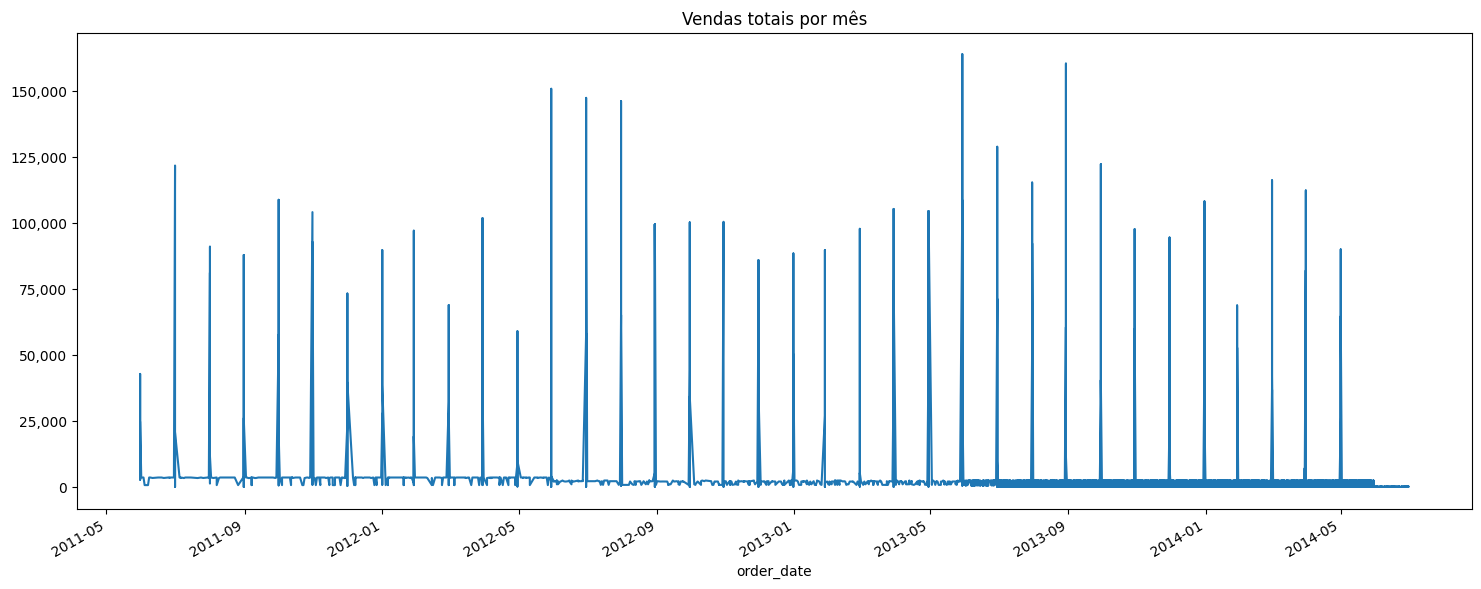

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots()

# Plotar os dados
amostra['subtotal'].plot(figsize=(18, 7))

# Ajustar a formatação do eixo y para mostrar os números em escala de milhar
formatter = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
ax.yaxis.set_major_formatter(formatter)

plt.title('Vendas totais por mês')
plt.show()


<ipython-input-27-151cb35cc509>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = amostra.resample('M').sum()  # 'M' para mensal



Análise para mês:


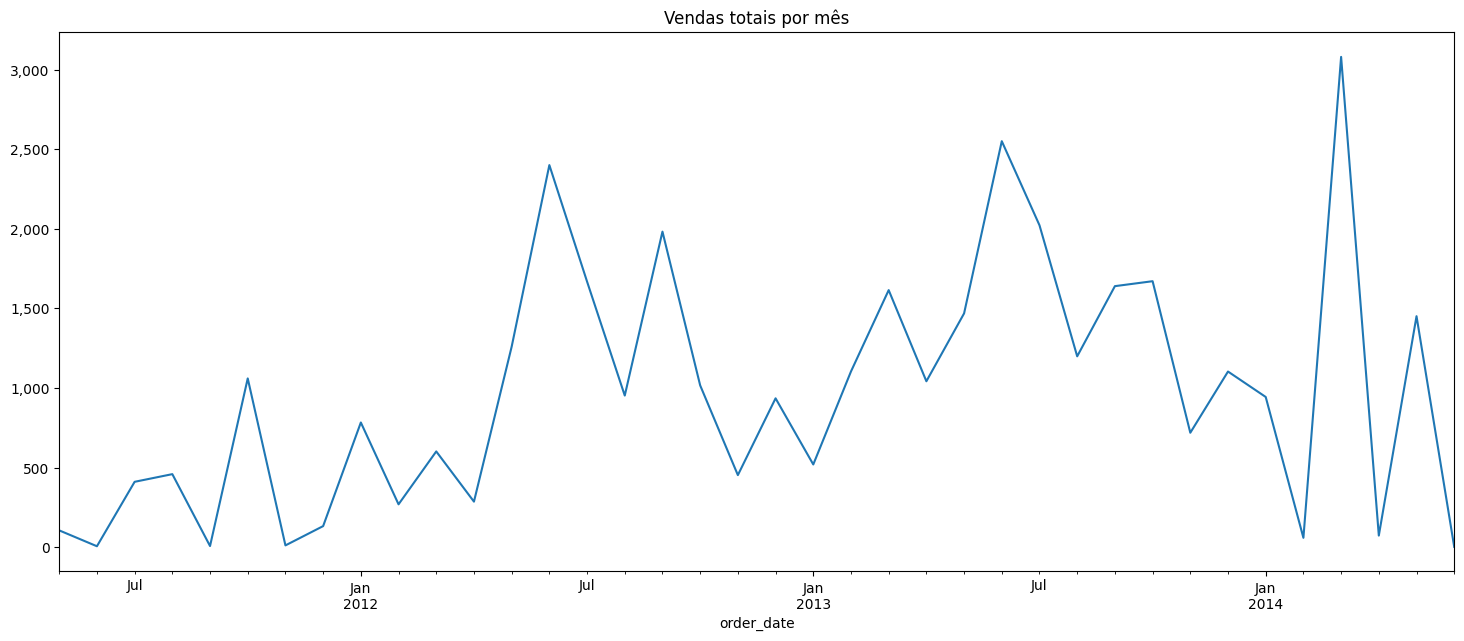

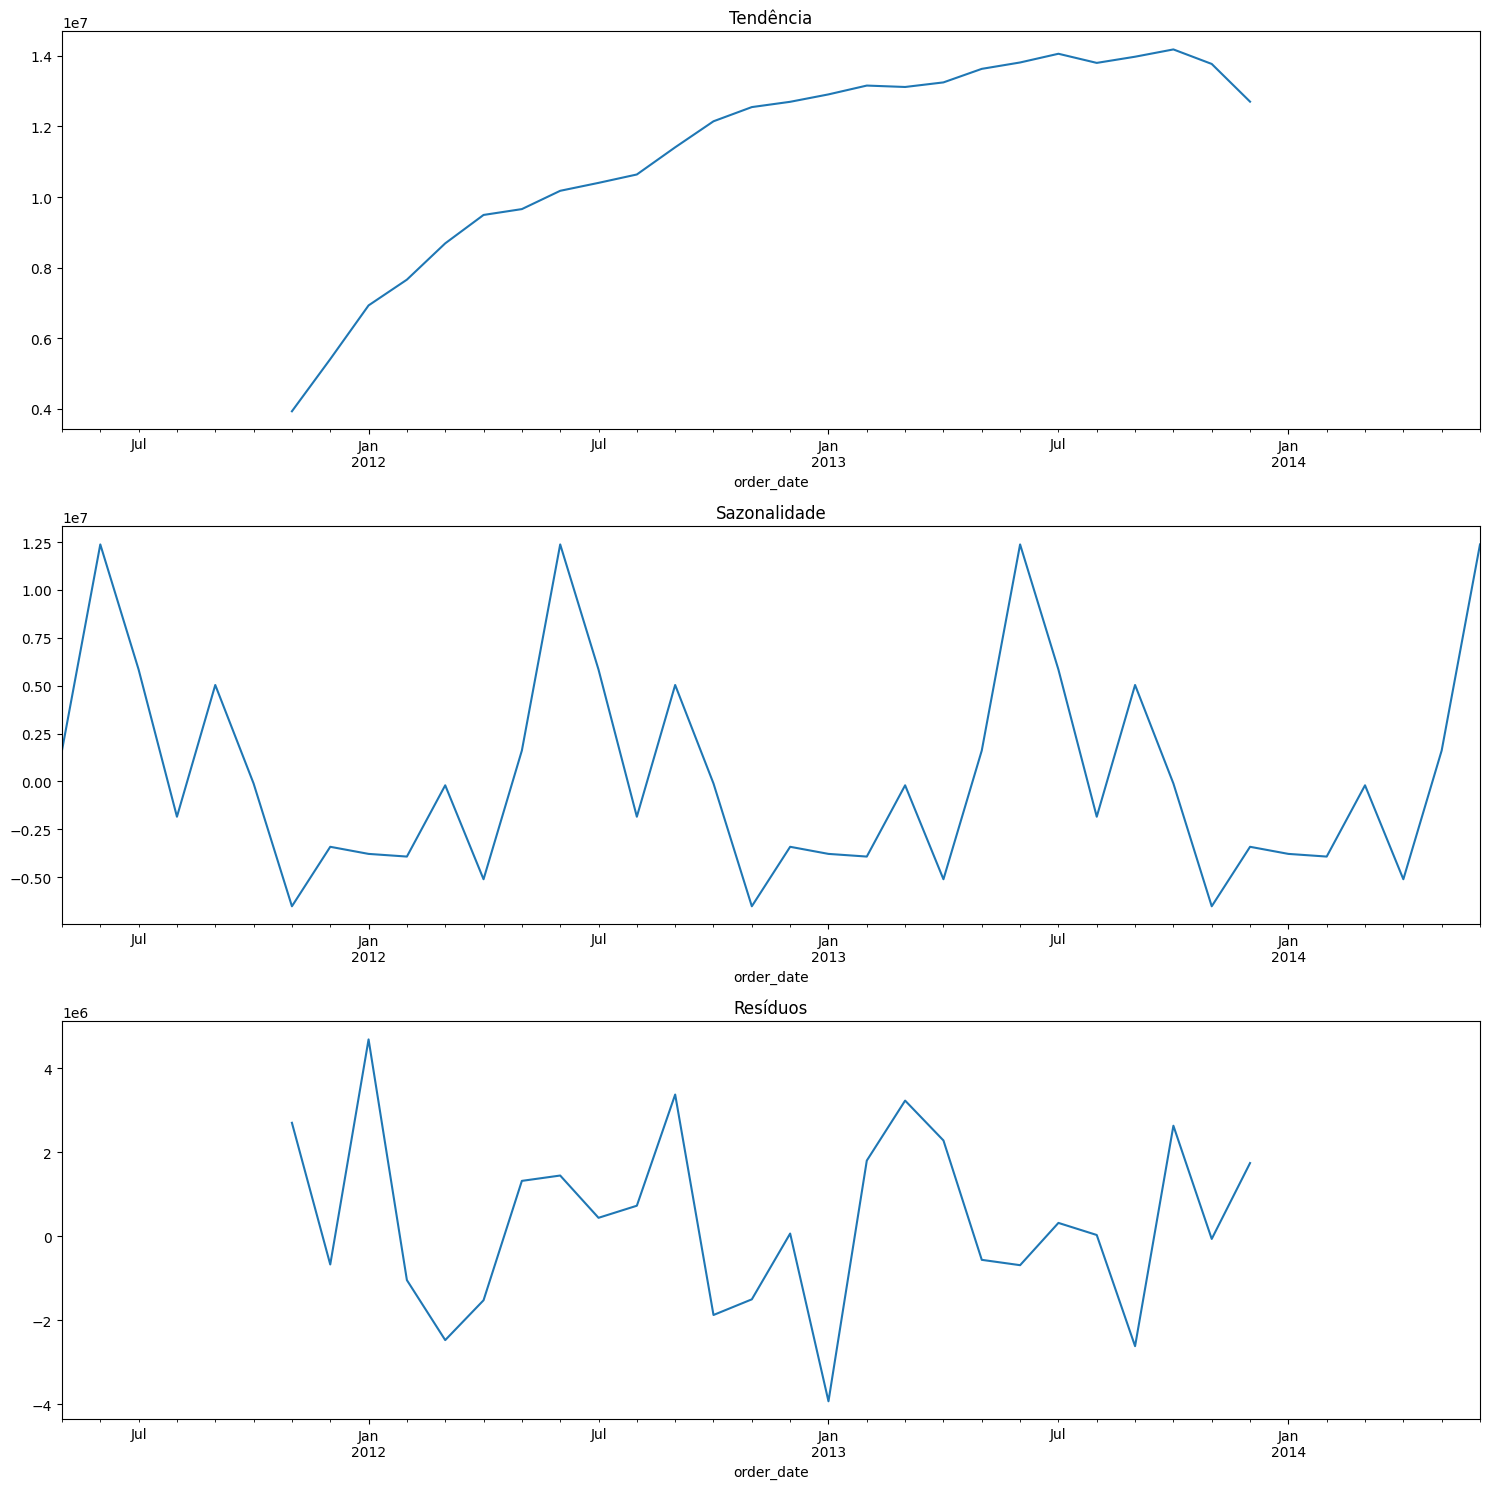

ADF Statistic: -5.050285
p-value: 0.000018


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Agregue seus dados por dia, semana, mês, etc.
# df_daily = amostra.resample('D').sum()  # 'D' para diário
# df_weekly = amostra.resample('W').sum()  # 'W' para semanal
df_monthly = amostra.resample('M').sum()  # 'M' para mensal
# df_yearly = amostra.resample('Y').sum()  # 'Y' para anual

# Função para visualizar e decompor os dados
def analyze(amostra, freq):
    print(f'\nAnálise para {freq}:')

    fig, ax = plt.subplots(figsize=(18, 7))

    # Visualizar os dados
    amostra['subtotal'].plot(ax=ax)

    # Ajustar a formatação do eixo y para mostrar os números em escala de dezena de milhar
    formatter = ticker.FuncFormatter(lambda x, p: format(int(x/10000), ','))
    ax.yaxis.set_major_formatter(formatter)

    plt.title(f'Vendas totais por {freq}')
    plt.show()

    # Modelo de decomposição
    result = seasonal_decompose(amostra['subtotal'], model='additive')
    fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,15))
    result.trend.plot(ax=ax1)
    ax1.set_title('Tendência')
    result.seasonal.plot(ax=ax2)
    ax2.set_title('Sazonalidade')
    result.resid.plot(ax=ax3)
    ax3.set_title('Resíduos')
    plt.tight_layout()
    plt.show()

    # Teste para sazonalidade
    result = adfuller(amostra['subtotal'].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

# Analise dos dados
# analyze(df_daily, 'dia')
# analyze(df_weekly, 'semana')
analyze(df_monthly, 'mês')
# analyze(df_yearly, 'ano')
